In [9]:
%matplotlib widget

from __future__ import annotations

import re
from collections import defaultdict
from dataclasses import dataclass, field
from itertools import permutations, product
from math import inf
from random import choice

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import numpy.typing as npt
from mpl_toolkits.mplot3d import axes3d
from numpy import int_, object_
from numpy.typing import NDArray
from test_utilities import run_tests_params
from util import print_hex

COLORS = list(mcolors.CSS4_COLORS.keys())

<link href="style.css" rel="stylesheet"></link>
<article class="day-desc read-aloud"><h2>--- Day 23: Experimental Emergency Teleportation ---</h2><p>Using your torch to search the darkness of the rocky cavern, you finally locate the man's friend: a small <em>reindeer</em>.</p>
<p>You're not sure how it got so far in this cave.  It looks sick - too sick to walk - and too heavy for you to carry all the way back.  Sleighs won't be invented for another 1500 years, of course.</p>
<p>The only option is <em>experimental emergency teleportation</em>.</p>
<p>You hit the "experimental emergency teleportation" <span title="We've always had this button; we've just been too scared to press it.">button</span> on the device and push <em>I accept the risk</em> on no fewer than 18 different warning messages. Immediately, the device deploys hundreds of tiny <em>nanobots</em> which fly around the cavern, apparently assembling themselves into a very specific <em>formation</em>. The device lists the <code>X,Y,Z</code> position (<code>pos</code>) for each nanobot as well as its <em>signal radius</em> (<code>r</code>) on its tiny screen (your puzzle input).</p>
<p>Each nanobot can transmit signals to any integer coordinate which is a distance away from it <em>less than or equal to</em> its signal radius (as measured by <a href="https://en.wikipedia.org/wiki/Taxicab_geometry">Manhattan distance</a>). Coordinates a distance away of less than or equal to a nanobot's signal radius are said to be <em>in range</em> of that nanobot.</p>
<p>Before you start the teleportation process, you should determine which nanobot is the <em>strongest</em> (that is, which has the largest signal radius) and then, for that nanobot, the <em>total number of nanobots that are in range</em> of it, <em>including itself</em>.</p>
<p>For example, given the following nanobots:</p>
<pre><code>pos=&lt;0,0,0&gt;, r=4
pos=&lt;1,0,0&gt;, r=1
pos=&lt;4,0,0&gt;, r=3
pos=&lt;0,2,0&gt;, r=1
pos=&lt;0,5,0&gt;, r=3
pos=&lt;0,0,3&gt;, r=1
pos=&lt;1,1,1&gt;, r=1
pos=&lt;1,1,2&gt;, r=1
pos=&lt;1,3,1&gt;, r=1
</code></pre>
<p>The strongest nanobot is the first one (position <code>0,0,0</code>) because its signal radius, <code>4</code> is the largest. Using that nanobot's location and signal radius, the following nanobots are in or out of range:</p>
<ul>
<li>The nanobot at <code>0,0,0</code> is distance <code>0</code> away, and so it is <em>in range</em>.</li>
<li>The nanobot at <code>1,0,0</code> is distance <code>1</code> away, and so it is <em>in range</em>.</li>
<li>The nanobot at <code>4,0,0</code> is distance <code>4</code> away, and so it is <em>in range</em>.</li>
<li>The nanobot at <code>0,2,0</code> is distance <code>2</code> away, and so it is <em>in range</em>.</li>
<li>The nanobot at <code>0,5,0</code> is distance <code>5</code> away, and so it is <em>not</em> in range.</li>
<li>The nanobot at <code>0,0,3</code> is distance <code>3</code> away, and so it is <em>in range</em>.</li>
<li>The nanobot at <code>1,1,1</code> is distance <code>3</code> away, and so it is <em>in range</em>.</li>
<li>The nanobot at <code>1,1,2</code> is distance <code>4</code> away, and so it is <em>in range</em>.</li>
<li>The nanobot at <code>1,3,1</code> is distance <code>5</code> away, and so it is <em>not</em> in range.</li>
</ul>
<p>In this example, in total, <code><em>7</em></code> nanobots are in range of the nanobot with the largest signal radius.</p>
<p>Find the nanobot with the largest signal radius.  <em>How many nanobots are in range</em> of its signals?</p>
</article>


In [10]:
from re import findall


example = """
pos=<0,0,0>, r=4
pos=<1,0,0>, r=1
pos=<4,0,0>, r=3
pos=<0,2,0>, r=1
pos=<0,5,0>, r=3
pos=<0,0,3>, r=1
pos=<1,1,1>, r=1
pos=<1,1,2>, r=1
pos=<1,3,1>, r=1
"""


def parse(s: str) -> list[list[int]]:
    return [[int(i) for i in findall(r"-?\d+", l)] for l in s.strip().splitlines()]


def distance(nanobot1: list[int], nanobot2: list[int]) -> int:
    x1, y1, z1, _ = nanobot1
    x2, y2, z2, _ = nanobot2
    return abs(x1 - x2) + abs(y1 - y2) + abs(z1 - z2)


def number_of_nanobots_in_range_of_strongest(s: str) -> int:
    nanobots = parse(s)
    strongest = max(nanobots, key=lambda nb: nb[-1])
    return sum(1 for nb in nanobots if distance(nb, strongest) <= strongest[-1])


number_of_nanobots_in_range_of_strongest(example)
print(f"Example: {number_of_nanobots_in_range_of_strongest(example)} should be 7")

Example: 7 should be 7


In [11]:
with open("../input/day23.txt") as f:
    puzzle = f.read()

number_of_nanobots_in_range_of_strongest(puzzle)
print(f"Part 1: {number_of_nanobots_in_range_of_strongest(puzzle)}")

Part 1: 248


<link href="style.css" rel="stylesheet"></link>
<main>

<p>Your puzzle answer was <code>248</code>.</p><p class="day-success">The first half of this puzzle is complete! It provides one gold star: *</p>
<article class="day-desc"><h2 id="part2">--- Part Two ---</h2><p>Now, you just need to figure out where to position yourself so that you're actually teleported when the nanobots activate.</p>
<p>To increase the probability of success, you need to find the coordinate which puts you <em>in range of the largest number of nanobots</em>. If there are multiple, choose one <em>closest to your position</em> (<code>0,0,0</code>, measured by manhattan distance).</p>
<p>For example, given the following nanobot formation:</p>
<pre><code>pos=&lt;10,12,12&gt;, r=2
pos=&lt;12,14,12&gt;, r=2
pos=&lt;16,12,12&gt;, r=4
pos=&lt;14,14,14&gt;, r=6
pos=&lt;50,50,50&gt;, r=200
pos=&lt;10,10,10&gt;, r=5
</code></pre>
<p>Many coordinates are in range of some of the nanobots in this formation.  However, only the coordinate <code>12,12,12</code> is in range of the most nanobots: it is in range of the first five, but is not in range of the nanobot at <code>10,10,10</code>. (All other coordinates are in range of fewer than five nanobots.) This coordinate's distance from <code>0,0,0</code> is <code><em>36</em></code>.</p>
<p>Find the coordinates that are in range of the largest number of nanobots. <em>What is the shortest manhattan distance between any of those points and <code>0,0,0</code>?</em></p>
</article>

</main>


> This is: Klee's measure problem
>
> [Day 23 - AOC creator's logic](https://www.reddit.com/r/adventofcode/comments/aa9uvg/day_23_aoc_creators_logic/)
>
> [Introduction to Octrees](https://www.gamedev.net/tutorials/programming/general-and-gameplay-programming/introduction-to-octrees-r3529/)
>
> [Coding Challenge #98.1: Quadtree - Part 1](https://youtu.be/OJxEcs0w_kE)
>
> [Coding Challenge #98.2: Quadtree - Part 2](https://youtu.be/QQx_NmCIuCY)
>
> [Coding Challenge #98.3: Quadtree Collisions - Part 3](https://youtu.be/z0YFFg_nBjw)
>
> [Quadtrees, Balanced Quadtrees, and Meshing](https://youtu.be/Ac47eHdSZuE)
>
> [Advent of Code 2018 (Python) - day 23](https://youtu.be/ty7SG_pqDCs?t=1121)


In [12]:
from pydoc import cli
from typing import Any
from networkx import neighbors


example_2 = """
pos=<10,12,12>, r=2
pos=<12,14,12>, r=2
pos=<16,12,12>, r=4
pos=<14,14,14>, r=6
pos=<50,50,50>, r=200
pos=<10,10,10>, r=5
"""


@dataclass(frozen=True, order=True)
class Nanobot:
    x: int
    y: int
    z: int
    r: int

    def distance(self, other: Nanobot) -> int:
        return abs(self.x - other.x) + abs(self.y - other.y) + abs(self.z - other.z)

    def in_range(self, other: Nanobot) -> bool:
        return self.distance(other) <= self.r

    def within_range_off_shared_point(self, other: Nanobot) -> bool:
        return self.distance(other) <= self.r + other.r

    @classmethod
    def parse(cls, s: str) -> list[Nanobot]:
        return [
            Nanobot(*[int(i) for i in findall(r"-?\d+", l)])
            for l in s.strip().splitlines()
        ]


class BronKerbosch:
    def __init__(self, neighbors: dict[Nanobot, set[Nanobot]]) -> None:
        self.neighbors = neighbors
        self.best_r = set()

    def largest_clique(self) -> set[Nanobot]:
        self.execute(set(self.neighbors.keys()), set(), set())
        return self.best_r

    def execute(self, p: set[Nanobot], r: set[Nanobot], x: set[Nanobot]) -> None:
        if not p and not x:
            if len(r) > len(self.best_r):
                self.best_r = r
        else:
            pivot = max(p | x, key=lambda n: len(self.neighbors[n]), default=0)
            for v in p - self.neighbors[pivot]:
                v_neighbors = self.neighbors[v]
                self.execute(p & v_neighbors, r | {v}, x & v_neighbors)
                p.remove(v)
                x.add(v)


def bronKerbosch_container(s: str) -> int:
    nanobots = Nanobot.parse(s)
    neighbors = {
        bot: {b for b in nanobots if b != bot and bot.within_range_off_shared_point(b)}
        for bot in nanobots
    }
    clique = BronKerbosch(neighbors).largest_clique()
    return sorted((abs(n.x) + abs(n.y) + abs(n.z) - abs(n.r), n) for n in clique)


bronKerbosch_container(example_2)

[(-50, Nanobot(x=50, y=50, z=50, r=200)),
 (32, Nanobot(x=10, y=12, z=12, r=2)),
 (36, Nanobot(x=12, y=14, z=12, r=2)),
 (36, Nanobot(x=14, y=14, z=14, r=6)),
 (36, Nanobot(x=16, y=12, z=12, r=4))]

In [13]:
bronKerbosch_container(puzzle), 124623002  # one of error!

([(-61197956, Nanobot(x=29343236, y=1187803, z=6824472, r=98553467)),
  (-59957948, Nanobot(x=3390783, y=-97080, z=28941758, r=92387569)),
  (-59427925, Nanobot(x=29275495, y=5574773, z=3322379, r=97600572)),
  (-51453440, Nanobot(x=-4167942, y=7263878, z=29321024, r=92206284)),
  (-51004058, Nanobot(x=29373960, y=9854464, z=3254666, r=93487148)),
  (-45745797, Nanobot(x=31269130, y=15738239, z=-198424, r=92951590)),
  (-44413797, Nanobot(x=37147677, y=16371717, z=32587, r=97965778)),
  (-44057496, Nanobot(x=35187896, y=3414709, z=13167709, r=95827810)),
  (-41921290, Nanobot(x=-3693033, y=25711563, z=15639293, r=86965179)),
  (-41573962, Nanobot(x=39821084, y=2625485, z=15198650, r=99219181)),
  (-40999805, Nanobot(x=24997327, y=-8933645, z=18111447, r=93042224)),
  (-39400435, Nanobot(x=29017743, y=-365380, z=18911044, r=87694602)),
  (-39164375, Nanobot(x=27309285, y=19028946, z=-9739407, r=95242013)),
  (-39011844, Nanobot(x=-5934679, y=23398706, z=19406893, r=87752122)),
  (-38470

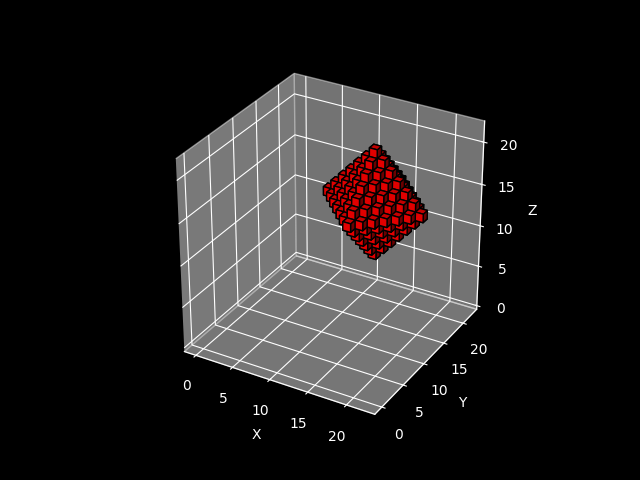

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_aspect("equal")


# prepare some coordinates
x, y, z = np.indices((22, 22, 22))

# draw cuboids in the top left and bottom right corners, and a link between
# them
xc, yc, zc, r = 14, 14, 14, 6

link = abs(x - xc) + abs(y - yc) + abs(z - zc) <= r

# combine the objects into a single boolean array
voxelarray = link

# set the colors of each object
colors = np.empty(voxelarray.shape, dtype=object)
colors[link] = "red"

# and plot everything
ax.voxels(voxelarray, facecolors=colors, edgecolor="k")

plt.show()

In [15]:
from tabulate import tabulate


rows, cols = 11, 11

grid = [[0] * cols for _ in range(cols)]

cr, cc = 5, 5
for r, c in product(range(rows), range(cols)):
    grid[r][c] = abs(r - cr) + abs(c - cc)

print(tabulate(grid))

--  -  -  -  -  -  -  -  -  -  --
10  9  8  7  6  5  6  7  8  9  10
 9  8  7  6  5  4  5  6  7  8   9
 8  7  6  5  4  3  4  5  6  7   8
 7  6  5  4  3  2  3  4  5  6   7
 6  5  4  3  2  1  2  3  4  5   6
 5  4  3  2  1  0  1  2  3  4   5
 6  5  4  3  2  1  2  3  4  5   6
 7  6  5  4  3  2  3  4  5  6   7
 8  7  6  5  4  3  4  5  6  7   8
 9  8  7  6  5  4  5  6  7  8   9
10  9  8  7  6  5  6  7  8  9  10
--  -  -  -  -  -  -  -  -  -  --


<link href="style.css" rel="stylesheet"></link>
<h1>Day 23 Part 2 - Adversarial input for recursive partitioning solutions</h1>
<a href="https://www.reddit.com/r/adventofcode/comments/a9co1u/day_23_part_2_adversarial_input_for_recursive/">https://www.reddit.com/r/adventofcode/comments/a9co1u/day_23_part_2_adversarial_input_for_recursive/</a>
<div id="t3_a9co1u-post-rtjson-content" class="md text-14 read-aloud" style="--emote-size: 20px">
    <p>
    The most common solution idea I've seen proposed for this problem is recursive partitioning. The idea: keep a priority queue of spaces left to explore, ordered by (biggest # of bots intersecting the space, smallest distance to origin, smallest size). Start with the entire space, and recursively partition it into 8 cubes or 6 spheres or something, keeping track of how many bots intersect each recursive space. Stop once you see a space of size 1. This is guaranteed to be the right answer, since all other candidates have worse tiebreakers.
  </p><p>
    What is the worst-case performance of this idea? The main variability is how much space it has to explore. If it can quickly narrow in on the most promising area, it may not have to explore much at all. But if there are a lot of false positives that look potentially good but aren't really, it will be slow.
  </p><p>
    How could we construct input with a lot of false positives? We need a lot of near collisions in our nanobots, so that at coarse resolutions, a lot of things will look connected, but as we zoom in, they will turn out not to be.
  </p><p>
    Let's make a grid of nanobots that barely don't touch on each face. Then the real answer will be 1. But each pair of faces will appear to touch on any coarser grid scale. So any recursive partitioning solution will have to scan over the whole area of each face with its smallest-but-one grid size. Since each face has area proportional to radius<sup style="">2</sup> (which can be enormous), this will make such solutions run slowly. Here is some input which implements this idea: <a rpl="" class="relative pointer-events-auto a
  
  
  
  
  hover:underline
  " href="https://pastebin.com/9eJQN836" rel="noopener nofollow ugc" target="_blank">https://pastebin.com/9eJQN836</a>
  </p><p>
    If you have a recursive-partitioning solution that runs quickly on this input, let me know.
  </p>
  </div>


In [16]:
import re
import heapq


def distance(x, y):
    return abs(x[0] - y[0]) + abs(x[1] - y[1]) + abs(x[2] - y[2])


def num_in_range(coord):
    return len([x for x in nanobots if distance(x, coord) <= x[3]])


def get_extents(nanobots):
    maximums = [0, 0, 0]
    minimums = [0, 0, 0]
    for bot in nanobots:
        for i in range(0, 3):
            maximums[i] = max(maximums[i], bot[i])
            minimums[i] = min(minimums[i], bot[i])
    return (maximums[0], maximums[1], maximums[2]), (
        minimums[0],
        minimums[1],
        minimums[2],
    )


def get_corners(cube):
    return [
        cube[0],
        cube[1],
        (cube[1][0], cube[0][1], cube[0][2]),
        (cube[0][0], cube[1][1], cube[0][2]),
        (cube[0][0], cube[0][1], cube[1][2]),
        (cube[1][0], cube[1][1], cube[0][2]),
        (cube[0][0], cube[1][1], cube[1][2]),
        (cube[1][0], cube[0][1], cube[1][2]),
    ]


def get_cube_containment(cube, nanobots):
    corners = get_corners(cube)
    num_inside = 0
    for bot in nanobots:
        if (
            bot[0] <= max(cube[0][0], cube[1][0])
            and bot[0] >= min(cube[0][0], cube[1][0])
            and bot[1] <= max(cube[0][1], cube[1][1])
            and bot[1] >= min(cube[0][1], cube[1][1])
            and bot[2] <= max(cube[0][2], cube[1][2])
            and bot[2] >= min(cube[0][2], cube[1][2])
        ):
            # inside
            num_inside += 1
            continue
        for corner in corners:
            if distance(bot, corner) <= bot[3]:
                num_inside += 1
                break
    return num_inside


def get_center(cube):
    return (
        int((cube[0][0] + cube[1][0]) / 2),
        int((cube[0][1] + cube[1][1]) / 2),
        int((cube[0][2] + cube[1][2]) / 2),
    )


def split_cube(orig_cube):
    center = get_center(orig_cube)
    corners = get_corners(orig_cube)
    raw_cubes = [(center, x) for x in corners]
    out_cubes = []
    for cube in raw_cubes:
        out_cubes.append(
            (
                (
                    max(cube[0][0], cube[1][0]),
                    max(cube[0][1], cube[1][1]),
                    max(cube[0][2], cube[1][2]),
                ),
                (
                    min(cube[0][0], cube[1][0]),
                    min(cube[0][1], cube[1][1]),
                    min(cube[0][2], cube[1][2]),
                ),
            )
        )
    return out_cubes


def score_cubes(cubes, nanobots):
    return [
        ((-get_cube_containment(cube, nanobots), area_of_cube(cube)), cube)
        for cube in cubes
    ]


def area_of_cube(cube):
    return (
        abs(1 + cube[0][0] - cube[1][0])
        * abs(1 + cube[0][1] - cube[1][1])
        * abs(1 + cube[0][2] - cube[1][2])
    )


nanobots = []
with open("../input/day23.txt", "r") as fp:
    for line in fp:
        args = list(map(int, re.findall(r"-?\d+", line)))
        nanobots.append((args[0], args[1], args[2], args[3]))


extents = get_extents(nanobots)
print("Extents: " + str(extents))

cubes = split_cube(extents)
scores = score_cubes(cubes, nanobots)

queue = []
for score in scores:
    heapq.heappush(queue, score)

best_small = None
best_small_score = 0
while queue:
    score_tuple, cube = heapq.heappop(queue)
    score, area = score_tuple
    area = area_of_cube(cube)
    # print(
    #     "Next Cube: score="
    #     + str(-score)
    #     + " sz="
    #     + str(area)
    #     + " "
    #     + str(cube)
    #     + " queue="
    #     + str(len(queue))
    # )
    cubes = split_cube(cube)
    new_scores = score_cubes(cubes, nanobots)
    for new_score in new_scores:
        if new_score[0][1] > 8 and -new_score[0][0] >= best_small_score:  # area
            heapq.heappush(queue, new_score)
        elif new_score[0][1] <= 8:
            if -new_score[0][0] > best_small_score:
                best_small = [new_score[1]]
                best_small_score = -new_score[0][0]
                print("new best " + str(new_score))
            elif -new_score[0][0] == best_small_score:
                best_small.append(new_score[1])

best_point = None
best_point_score = 0
print("Best Small Cube: " + str(best_small))
for cube in best_small:
    for x in range(cube[1][0], cube[0][0] + 1):
        for y in range(cube[1][1], cube[0][1] + 1):
            for z in range(cube[1][2], cube[0][2] + 1):
                point = (x, y, z)
                score = num_in_range(point)
                if score > best_point_score:
                    best_point_score = score
                    best_point = [point]
                elif score == best_point_score:
                    best_point.append(point)

print("Best Points: " + str(best_point) + " score " + str(best_point_score))
print(
    "Min: "
    + str(
        min(
            [(distance(point, (0, 0, 0)), point) for point in best_point],
            key=lambda x: x[0],
        )
    )
)

Extents: ((210961823, 188315403, 222340373), (-169285676, -85409598, -84576691))
new best ((-978, 8), ((23700389, 42553857, 58368749), (23700388, 42553856, 58368748)))
new best ((-980, 8), ((23700391, 42553859, 58368751), (23700390, 42553858, 58368750)))
new best ((-981, 8), ((23700389, 42553861, 58368751), (23700388, 42553860, 58368750)))
Best Small Cube: [((23700389, 42553861, 58368751), (23700388, 42553860, 58368750)), ((23700391, 42553860, 58368751), (23700390, 42553859, 58368750)), ((23700390, 42553860, 58368751), (23700389, 42553859, 58368750)), ((23700390, 42553861, 58368751), (23700389, 42553860, 58368750)), ((23700390, 42553860, 58368751), (23700389, 42553860, 58368750)), ((23700388, 42553861, 58368752), (23700387, 42553860, 58368751)), ((23700388, 42553861, 58368753), (23700387, 42553860, 58368752)), ((23700388, 42553861, 58368752), (23700387, 42553860, 58368752)), ((23700389, 42553860, 58368752), (23700388, 42553859, 58368751)), ((23700389, 42553861, 58368753), (23700388, 42

<link href="style.css" rel="stylesheet"></link>
<p>Your puzzle answer was <code>124623002</code>.</p>
<p class="day-success">Both parts of this puzzle are complete! They provide two gold stars: **</p>
Was one off in clique answer!
This comes because answer is one one of the vertices of the octahedrons , not on the points. 🤓
Linear solver solution

[Z3 SOLUTION](https://publish.reddit.com/embed?url=https://www.reddit.com/r/adventofcode/comments/a8s17l/comment/ecdbux2?snippet=0_3_1)
